In [12]:
i = 34
Seed = 11

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.layers import BatchNormalization
from sklearn.utils import class_weight
from keras import regularizers

In [317]:
#inporting all the data
# remote_sensing_reflectance = pd.read_csv("all_habs_rrs_only.csv").fillna(0)
# shatonela_diatom = pd.read_csv("all_concatinated_data.csv", low_memory=False)
# karenia = pd.read_csv("all_karenia_data.csv", low_memory=False)  # import karenia data from the server here

In [318]:
# combining shatonela diatom and karenia data together
# akashivo_data = pd.concat([shatonela_diatom, karenia], axis=0)
# akashivo_data.to_csv("akashivo_data.csv", encoding='utf-8-sig')
# akashivo_data.rename(columns ={'緯度':'lat', '経度':'lon', '採取日':'date', 'シャットネラ属':'shatonela', '珪藻類合計':'diatom', 'カレニア　ミキモトイ':'karenia'} , inplace = True)
# akashivo_data.drop(['Unnamed: 4', '赤潮細胞数の単位', '採水層', '地点名'], inplace=True, axis=1)

In [ ]:
# connect the two dataframes with lat logn and date
# merged_data = pd.merge(akashivo_data, remote_sensing_reflectance, on=["lat", "lon", "date"], how = 'left').fillna(0)
# merged_data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'identifier', 'file_status', 'download_url', 'preview_url', 'resolution'], inplace=True, axis=1)
# print(merged_data['karenia'])

In [320]:
# # filder all the duplicates
# columns_to_check = ['shatonela', 'diatom', 'karenia', 'Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']
# filtered_df = merged_data[~merged_data.duplicated(subset=columns_to_check, keep='first')]
# filtered_df = filtered_df[~(filtered_df[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']] <= 0).any(axis=1)]
# filtered_df.to_csv("data.csv", encoding="utf-8-sig")

In [ ]:
# shatona = filtered_df[filtered_df['shatonela'] < 1000]
# print(filtered_df['shatonela'])

In [313]:
data = pd.read_csv("Merge_HABs_Chattonella_Diatom_Karenia_RrsOnly_OneDepth.csv")

columns_to_check = ['chattonella', 'diatoms', 'karenia_mikimoto', 'Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']
filtered_df = data[~data.duplicated(subset=columns_to_check, keep='first')]
filtered_df = filtered_df[~(filtered_df[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']] <= 0).any(axis=1)]
# used_columns = filtered_df[['diatoms', 'Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']]
# used_columns = used_columns.dropna()
print(len(filtered_df))

5009


In [42]:
# modifing the data to the correct form
# output_colums = used_columns[['diatoms']]
# input_colums = used_columns[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']]
# print(output_colums)

      diatoms
1745     17.0
1746   1095.0
1748    907.0
1750    158.0
1754   4727.0
...       ...
5491   5279.0
5496    606.0
5497      0.0
5498      0.0
5499   6375.0

[1608 rows x 1 columns]


In [263]:
# # randomaizing test and training data
# x_train, x_test, y_train, y_test = train_test_split(filtered_df[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']].to_numpy(), 
#                                                     filtered_df[['chattonella', 'diatoms', 'karenia_mikimoto']].to_numpy(), test_size=0.3)
# df_test = pd.DataFrame(columns=['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670', 'chattonella', 'diatoms', 'karenia_mikimoto'])
# df_test[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']] = x_test
# df_test[['chattonella', 'diatoms', 'karenia_mikimoto']] = y_test
# df_train = pd.DataFrame(columns=['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670', 'chattonella', 'diatoms', 'karenia_mikimoto'])
# df_train[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']] = x_train
# df_train[['chattonella', 'diatoms', 'karenia_mikimoto']] = y_train
# # test = np.array(zip(x_test, y_test))
# # train = np.array(zip(x_train, y_train))
# # df_test = pd.DataFrame(test, columns=['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670', 'HABS'])
# # df_train = pd.DataFrame(train, columns=['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670', 'HABS'])
# df_test.to_csv("test.csv")
# df_train.to_csv("train.csv")

In [300]:
# converts all the values in to 1es and 0es
df = pd.read_csv("train.csv")

# df = df.dropna()
x = df[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']].to_numpy()
y = df[['chattonella', 'diatoms', 'karenia_mikimoto']].to_numpy()
print((df['chattonella']).median())

In [311]:
dkar = df[['karenia_mikimoto']].dropna()
print(f"total number of values: {len(dkar['karenia_mikimoto'])}")
print(f"number of values greater then 0: {(dkar['karenia_mikimoto'] > 0).sum()}")
print(f"number of unique values: {len(dkar['karenia_mikimoto'].unique())}")
print(f"standard deviation: {(dkar['karenia_mikimoto']).std()}")
print(f"mean value: {(dkar['karenia_mikimoto']).mean()}")
print((df['karenia_mikimoto']).median())
print((dkar['karenia_mikimoto']).median())

total number of values: 2633
number of values greater then 0: 576
number of unique values: 222
standard deviation: 5958.019396808
mean value: 296.3610884922142
0.0
0.0


In [310]:
dat = df[['diatoms']].dropna()
print(f"total number of values: {len(dat['diatoms'])}")
print(f"number of values greater then 0: {(dat['diatoms'] > 0).sum()}")
print(f"number of unique values: {len(dat['diatoms'].unique())}")
print(f"standard deviation: {(dat['diatoms']).std()}")
print(f"mean value: {(dat['diatoms']).mean()}")
print((df['diatoms']).median())
print((dat['diatoms']).median())

total number of values: 1120
number of values greater then 0: 1053
number of unique values: 674
standard deviation: 5273.885666767256
mean value: 1701.407875
358.5
358.5


In [309]:
dchat= df[['chattonella']].dropna()
print(f"total number of values: {len(dchat['chattonella'])}")
print(f"number of values greater then 0: {(dchat['chattonella'] > 0).sum()}")
print(f"number of unique values: {len(dchat['chattonella'].unique())}")
print(f"standard deviation: {(dchat['chattonella']).std()}")
print(f"mean value: {(dchat['chattonella']).mean()}")
print((df['chattonella']).median())
print((dchat['chattonella']).median())

total number of values: 2213
number of values greater then 0: 524
number of unique values: 119
standard deviation: 264.0092363680931
mean value: 17.41990510619069
0.0
0.0


In [284]:
# normalizing Rrs
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
# x = np.log10(filtered_df[['Rrs_380', 'Rrs_412', 'Rrs_443', 'Rrs_490', 'Rrs_530', 'Rrs_565', 'Rrs_670']]).to_numpy()
print((df[['chattonella', 'diatoms', 'karenia_mikimoto']]).median())
y = (df[['chattonella', 'diatoms', 'karenia_mikimoto']] > 340.0).any(axis=1)
# print(sum(y))
# print(len(y))

chattonella           0.0
diatoms             279.0
karenia_mikimoto      0.0
dtype: float64


In [ ]:
np.random.seed(Seed)
tf.random.set_seed(Seed)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=Seed)

In [ ]:
def build_model():
    model = models.Sequential()

    model.add(layers.Reshape((1, 7), input_shape=(7,)))
    model.add(layers.LSTM(64, return_sequences=False))
    model.add(layers.Flatten())

    # model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(128, activation="relu"))
    # model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.4))

    # model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dropout(0.2))

    # model.add(BatchNormalization())

    # model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(32, activation="relu"))

    # model.add(layers.Dense(16, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_23 (Reshape)        (None, 1, 7)              0         
                                                                 
 lstm_23 (LSTM)              (None, 64)                18432     
                                                                 
 flatten_23 (Flatten)        (None, 64)                0         
                                                                 
 dense_93 (Dense)            (None, 128)               8320      
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_94 (Dense)            (None, 64)                8256      
                                                                 
 dropout_46 (Dropout)        (None, 64)              

In [ ]:

# i += 1
early_stopping = EarlyStopping(patience=400, monitor='val_loss', restore_best_weights=True)

model_checkpoint = ModelCheckpoint(f'model_versions/best_modelV{i}.keras', save_best_only=True, monitor = 'val_accuracy')
# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

reduce_lr = ReduceLROnPlateau(factor=0.01, patience=100, monitor='val_loss')
y_t = np.array(y_train, dtype=np.int32)
history = model.fit(x_train,
                    y_t,
                    epochs=2000,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    # class_weight=class_weight_dict,
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])


Epoch 1/2000
8/8 [==============================] - 1s 39ms/step - loss: 1.3967 - accuracy: 0.5122 - val_loss: 1.3631 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 1.3422 - accuracy: 0.5100 - val_loss: 1.3050 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 1.2842 - accuracy: 0.6633 - val_loss: 1.2451 - val_accuracy: 0.6844 - lr: 0.0010
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 1.2241 - accuracy: 0.6889 - val_loss: 1.1836 - val_accuracy: 0.6133 - lr: 0.0010
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 1.1638 - accuracy: 0.6622 - val_loss: 1.1221 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 1.1009 - accuracy: 0.6656 - val_loss: 1.0625 - val_accuracy: 0.6533 - lr: 0.0010
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 1.0476 -

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

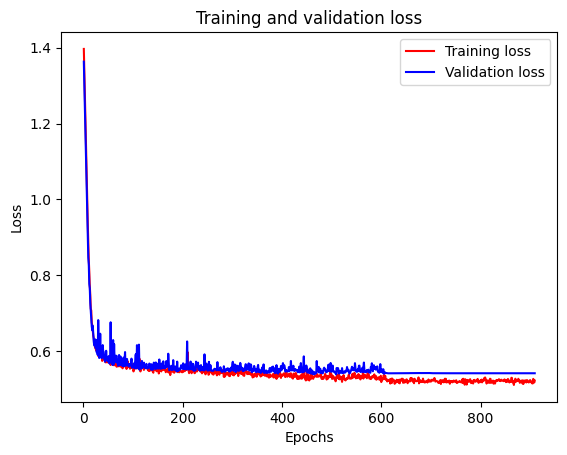

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

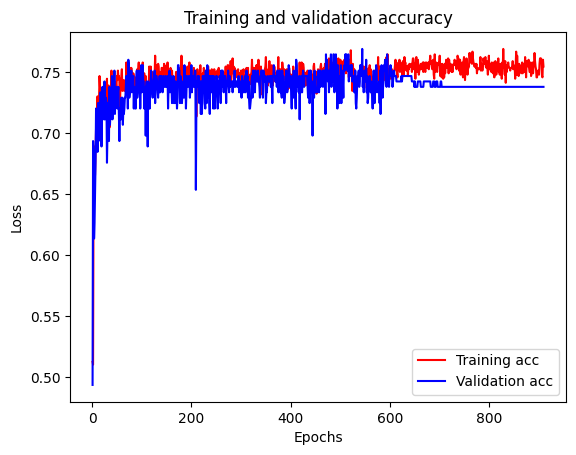

In [ ]:
plt.clf() 
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model = load_model(f'model_versions/best_modelV{i}.keras')
loss, accuracy = best_model.evaluate(x_val, y_val)

print(f"Accuracy: {accuracy * 100:.2f}%")

8/8 [==============================] - 0s 944us/step - loss: 0.5495 - accuracy: 0.7689
Accuracy: 76.89%


In [ ]:
y_pred = best_model.predict(x_val)

8/8 [==============================] - 1s 795us/step
